In [1]:
import matplotlib.pyplot as plt

In [2]:
def castFloat(str):
    return float(str.replace(',','.'))

In [3]:
# Read a file and push the elements into a list
def fileToList(fileName):
    list = []
    try:
        file = open(fileName)
        for line in file:
            list.append(castFloat(line))
        file.close()
    except IOError:
        errorMsg = fileName + ' could not be opened!'
        print(errorMsg)
    return list

In [4]:
# Compute the average of a list elements
def average(list):
#     list.sort()
#     # Remove all missing values
#     while 0 in list:
#         list.remove(0)
#     # Validation of list size
    if len(list) <= 0: return 0
#     if len(list) > 2:
#         del list[0]
#         del list[len(list)-1]
#     # computing the average
    sum = 0
    size = 0
    for number in list:
        if number > 0:
            sum += number
            size += 1
    return 0 if size == 0 else sum/size

In [5]:
# Compute the mean of a list elements
def mean(list):
    list.sort()
    # Remove all missing values
    while 0 in list:
        list.remove(0)
    # Validation of list size
    if len(list) <= 2: return 0
    if len(list) > 2:
        del list[0]
        del list[len(list)-1]
    # computing the mean
    sum = 0
    for number in list:
        sum += 1/number
#     return list[0]
#     return list[len(list)-1]
#     return (list[0] + list[len(list)-1]) / 2
    return len(list)/sum

In [6]:
# Process a set of files
def processTest(testFiles):
    data = []
    statistics = []
    for testFile in testFiles:
        data.append(fileToList(testFile))
    for j in range(len(data[0])):
        tuple = []
        for i in range(len(data)):
            tuple.append(data[i][j])
        statistics.append(average(tuple))
    return statistics

In [7]:
# Group elements in list
def toBuckets(data, bucketSize):
    i = 0
    sum = 0
    bucketList = []
    for element in data:
        sum += element
        i+=1
        if i == bucketSize:
            bucketList.append(sum/i)
            i = 0
            sum = 0
    return bucketList

In [8]:
# Print elements of list
def printList(data):
    for element in data:
        if element != 0:
            print(str(element).replace('.',','))
        else:
            print('null')

In [9]:
# This method summarizes the 10 execution of a test
def processTest(startTest, endTest, variation, typeAlg, nrCasesXVar, orderByValidG = False):
    completeData = []
    difs = 0
    # Append nrCasesXVar empty lists
    for i in range(nrCasesXVar):
        completeData.append([])
    # Store the averages of the cases
    for currentTest in range(startTest, endTest):
        for i in range(nrCasesXVar):
            path = 'TESTS/TEST %d/%s/%d/%sTime'%(currentTest, variation, i+1, typeAlg)
#             pathResult = 'TESTS/TEST %d/%s/%d/%s.result'%(currentTest, variation, i+1, typeAlg)
            avg = average(fileToList(path))
#             validG = average(fileToList(pathResult))
#             # If order by valid groups
#             if orderByValidG: 
#                 # Limit of tuples in set
#                 if validG > 0 and validG <= 100:# and len(completeData[int(validG)-1]) < 50:
#                     completeData[int(validG)-1].append(avg)
#             # Default order
#             else:
            completeData[i].append(avg)
    
#     return completeData
    # Computing the statistics for every case
    statistics = []
    for tuple in completeData:
#         print('---->', len(tuple))
        statistics.append(average(tuple))
            
#     print(completeData)
#     print(statistics)
#     print(difs)
    return statistics
    
startTest = 1
endTest = 2
# processTest(startTest,endTest,'VarDividend','fts_all', 10)

In [10]:
def findDifs(startTest, endTest, variation, typesAlg, nrCasesXVar, isDbg = False):
    difs = 0
    total = 0
    # Store the averages of the cases
    for currentTest in range(startTest, endTest):
        for i in range(nrCasesXVar):
            pathResult1 = 'TESTS/TEST %d/%s/%d/%s.result'%(currentTest, variation, i+1, typesAlg[0])
            pathResult2 = 'TESTS/TEST %d/%s/%d/%s.result'%(currentTest, variation, i+1, typesAlg[1])
            validG1 = average(fileToList(pathResult1))
            validG2 = average(fileToList(pathResult2))
            if validG1 != validG2:
                if isDbg:
                    print('Dif At TESTS/TEST %d/%s/%d: %d vs %d'%(currentTest, variation, i+1, validG1, validG2))
                difs += 1
            total += 1    
    return difs, total
    

In [11]:
bucketSize = 1
wantToPlot = True
nr_steps = 10

In [12]:
findDifs(startTest,endTest,'VarT1',['FORALL.fts', 'FORALL.index'], nr_steps, True)

TESTS/TEST 1/VarT1/1/FORALL.fts.result could not be opened!
TESTS/TEST 1/VarT1/1/FORALL.index.result could not be opened!
TESTS/TEST 1/VarT1/2/FORALL.fts.result could not be opened!
TESTS/TEST 1/VarT1/2/FORALL.index.result could not be opened!
TESTS/TEST 1/VarT1/3/FORALL.fts.result could not be opened!
TESTS/TEST 1/VarT1/3/FORALL.index.result could not be opened!
TESTS/TEST 1/VarT1/4/FORALL.fts.result could not be opened!
TESTS/TEST 1/VarT1/4/FORALL.index.result could not be opened!
TESTS/TEST 1/VarT1/5/FORALL.fts.result could not be opened!
TESTS/TEST 1/VarT1/5/FORALL.index.result could not be opened!
TESTS/TEST 1/VarT1/6/FORALL.fts.result could not be opened!
TESTS/TEST 1/VarT1/6/FORALL.index.result could not be opened!
TESTS/TEST 1/VarT1/7/FORALL.fts.result could not be opened!
TESTS/TEST 1/VarT1/7/FORALL.index.result could not be opened!
TESTS/TEST 1/VarT1/8/FORALL.fts.result could not be opened!
TESTS/TEST 1/VarT1/8/FORALL.index.result could not be opened!
TESTS/TEST 1/VarT1/9/FOR

(0, 10)

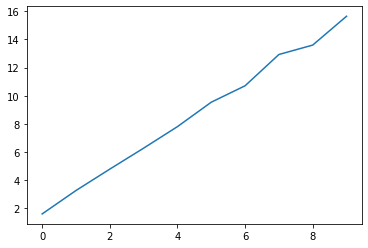

In [13]:
result = processTest(startTest,endTest,'VarT1','FORALL.fts', nr_steps)
result = toBuckets(result, bucketSize)
if wantToPlot:
    plt.plot(result)
else:
    printList(result)

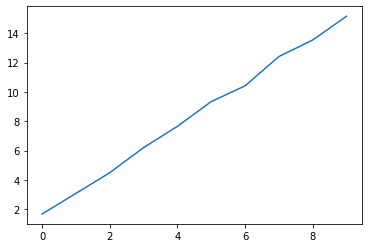

In [14]:
result = processTest(startTest,endTest,'VarT1','FORANY.fts', nr_steps)
result = toBuckets(result, bucketSize)
if wantToPlot:
    plt.plot(result)
else:
    printList(result)

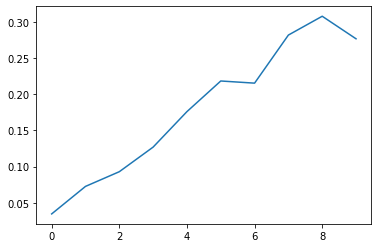

In [15]:
result = processTest(startTest,endTest,'VarT1','FORALL.index', nr_steps)
result = toBuckets(result, bucketSize)
if wantToPlot:
    plt.plot(result)
else:
    printList(result)

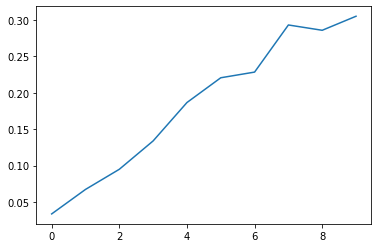

In [16]:
result = processTest(startTest,endTest,'VarT1','FORANY.index', nr_steps)
result = toBuckets(result, bucketSize)
if wantToPlot:
    plt.plot(result)
else:
    printList(result)

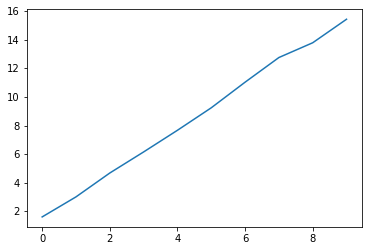

In [17]:
result = processTest(startTest,endTest,'VarT2','FORALL.fts', nr_steps)
result = toBuckets(result, bucketSize)
if wantToPlot:
    plt.plot(result)
else:
    printList(result)

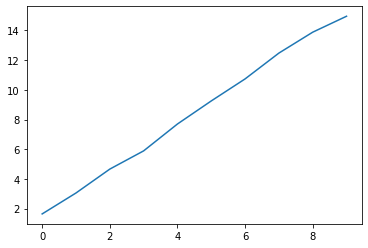

In [18]:
result = processTest(startTest,endTest,'VarT2','FORANY.fts', nr_steps)
result = toBuckets(result, bucketSize)
if wantToPlot:
    plt.plot(result)
else:
    printList(result)

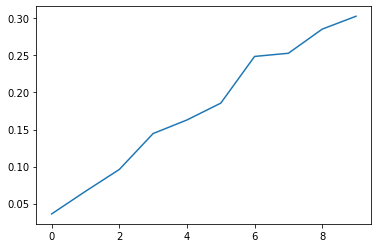

In [19]:
result = processTest(startTest,endTest,'VarT2','FORALL.index', nr_steps)
result = toBuckets(result, bucketSize)
if wantToPlot:
    plt.plot(result)
else:
    printList(result)

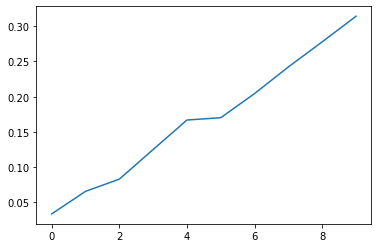

In [20]:
result = processTest(startTest,endTest,'VarT2','FORANY.index', nr_steps)
result = toBuckets(result, bucketSize)
if wantToPlot:
    plt.plot(result)
else:
    printList(result)

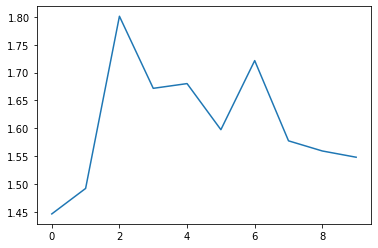

In [21]:
result = processTest(startTest,endTest,'VarTG','FORALL.fts', nr_steps)
result = toBuckets(result, bucketSize)
if wantToPlot:
    plt.plot(result)
else:
    printList(result)

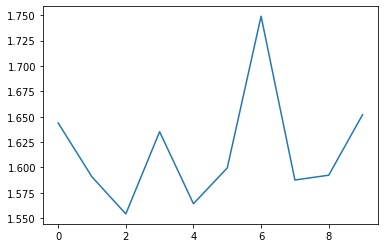

In [22]:
result = processTest(startTest,endTest,'VarTG','FORANY.fts', nr_steps)
result = toBuckets(result, bucketSize)
if wantToPlot:
    plt.plot(result)
else:
    printList(result)

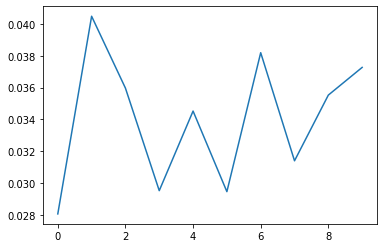

In [23]:
result = processTest(startTest,endTest,'VarTG','FORALL.index', nr_steps)
result = toBuckets(result, bucketSize)
if wantToPlot:
    plt.plot(result)
else:
    printList(result)

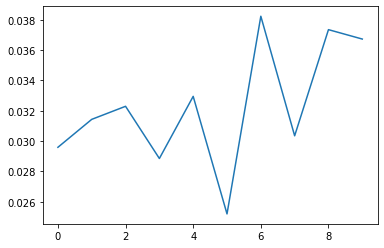

In [24]:
result = processTest(startTest,endTest,'VarTG','FORANY.index', nr_steps)
result = toBuckets(result, bucketSize)
if wantToPlot:
    plt.plot(result)
else:
    printList(result)

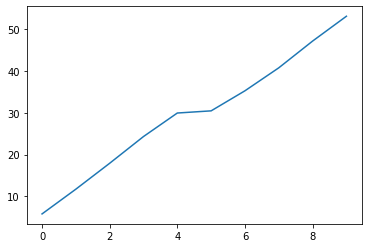

In [25]:
result = processTest(startTest,endTest,'VarL1L2','FORALL.fts', nr_steps)
result = toBuckets(result, bucketSize)
if wantToPlot:
    plt.plot(result)
else:
    printList(result)

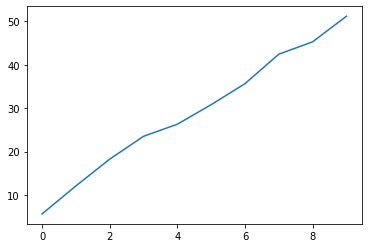

In [26]:
result = processTest(startTest,endTest,'VarL1L2','FORANY.fts', nr_steps)
result = toBuckets(result, bucketSize)
if wantToPlot:
    plt.plot(result)
else:
    printList(result)

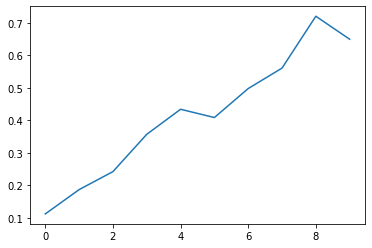

In [27]:
result = processTest(startTest,endTest,'VarL1L2','FORALL.index', nr_steps)
result = toBuckets(result, bucketSize)
if wantToPlot:
    plt.plot(result)
else:
    printList(result)

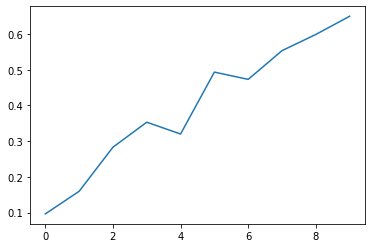

In [28]:
result = processTest(startTest,endTest,'VarL1L2','FORANY.index', nr_steps)
result = toBuckets(result, bucketSize)
if wantToPlot:
    plt.plot(result)
else:
    printList(result)

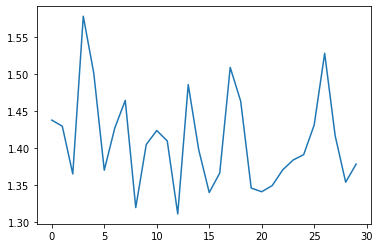

In [29]:
result = processTest(startTest,endTest,'VarDistribution','FORALL.fts', nr_steps*3)
result = toBuckets(result, bucketSize)
if wantToPlot:
    plt.plot(result)
else:
    printList(result)

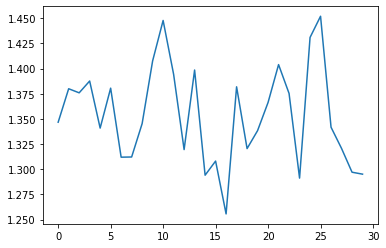

In [30]:
result = processTest(startTest,endTest,'VarDistribution','FORANY.fts', nr_steps*3)
result = toBuckets(result, bucketSize)
if wantToPlot:
    plt.plot(result)
else:
    printList(result)

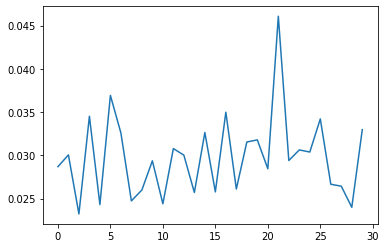

In [31]:
result = processTest(startTest,endTest,'VarDistribution','FORALL.index', nr_steps*3)
result = toBuckets(result, bucketSize)
if wantToPlot:
    plt.plot(result)
else:
    printList(result)

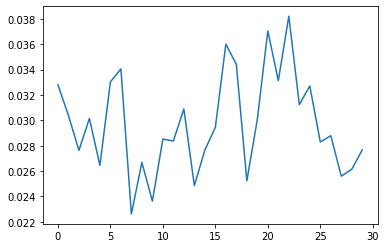

In [32]:
result = processTest(startTest,endTest,'VarDistribution','FORANY.index', nr_steps*3)
result = toBuckets(result, bucketSize)
if wantToPlot:
    plt.plot(result)
else:
    printList(result)

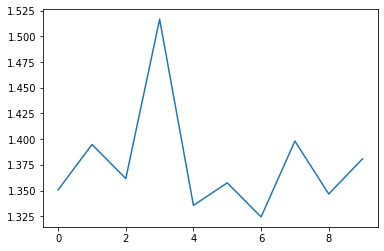

In [33]:
result = processTest(startTest,endTest,'VarValidGroupsForAll','FORALL.fts', nr_steps, True)
result = toBuckets(result, bucketSize)
if wantToPlot:
    plt.plot(result)
else:
    printList(result)

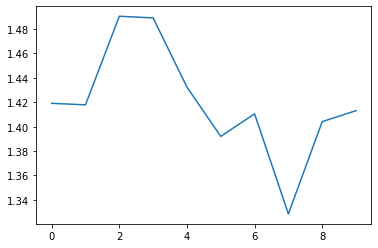

In [34]:
result = processTest(startTest,endTest,'VarValidGroupsForAny','FORANY.fts', nr_steps, True)
result = toBuckets(result, bucketSize)
if wantToPlot:
    plt.plot(result)
else:
    printList(result)

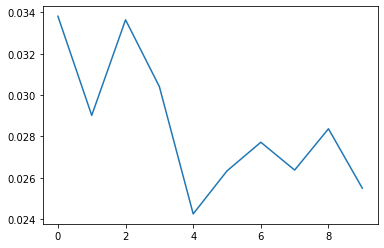

In [35]:
result = processTest(startTest,endTest,'VarValidGroupsForAll','FORALL.index', nr_steps, True)
result = toBuckets(result, bucketSize)
if wantToPlot:
    plt.plot(result)
else:
    printList(result)

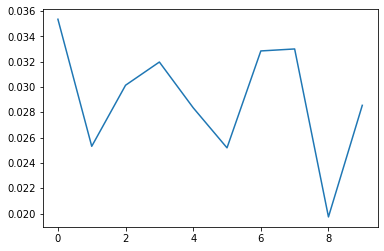

In [36]:
# startTest = 14
# endTest = 15
result = processTest(startTest,endTest,'VarValidGroupsForAny','FORANY.index', nr_steps, True)
result = toBuckets(result, bucketSize)
if wantToPlot:
    plt.plot(result)
else:
    printList(result)